In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

rng = np.random.default_rng()

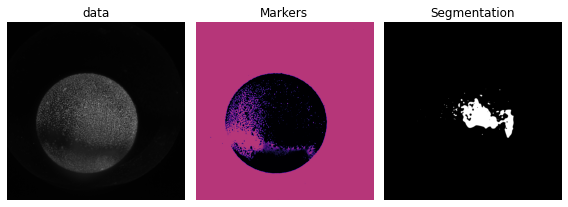

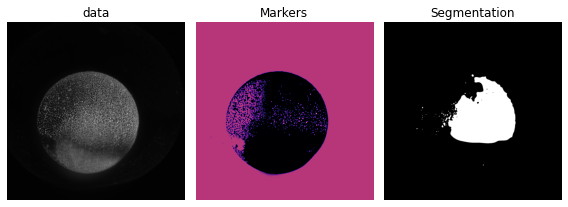

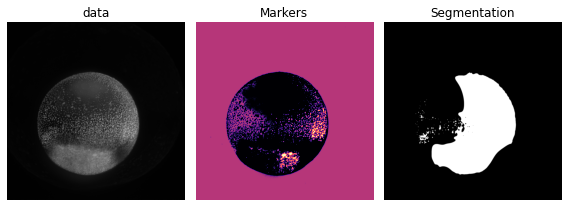

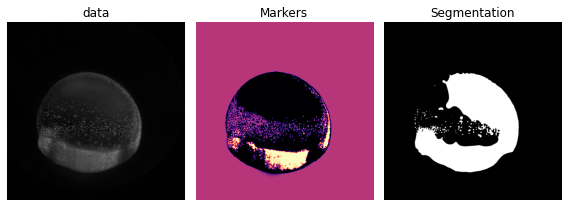

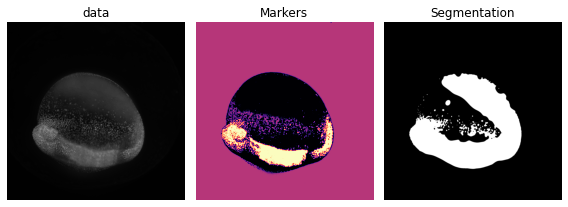

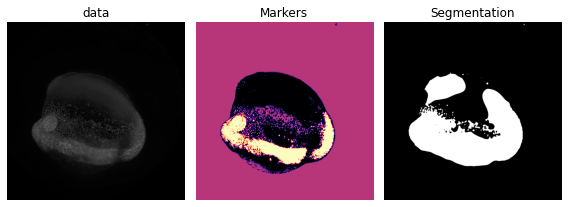

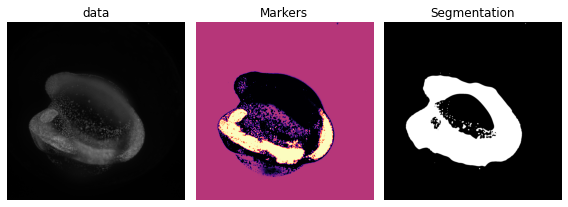

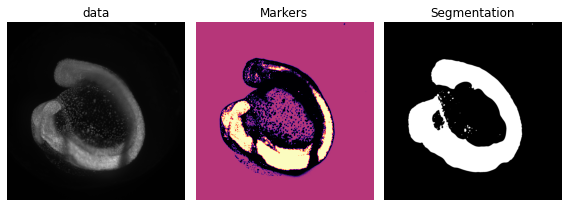

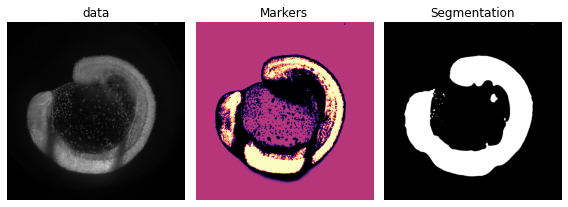

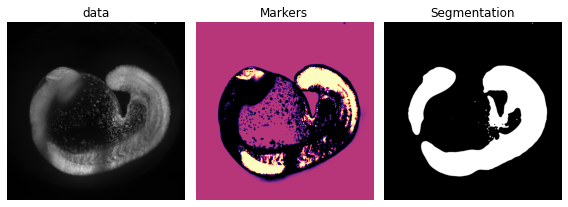

In [2]:
stack = imageio.mimread('embryo.tif')
np_stack = np.asarray(stack)

for i in range(len(np_stack)):
    # The input image.
    data = np_stack[i]

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
    markers = np.zeros(data.shape, dtype=np.uint)
    markers[data < 200] = 1
    markers[data > 600] = 2


    # Run random walker algorithm
    labels = random_walker(data, markers, beta=10, mode='bf')

    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                        sharex=True, sharey=True)
    ax1.imshow(data, cmap='gray')
    ax1.axis('off')
    ax1.set_title('data')
    ax2.imshow(markers, cmap='magma')
    ax2.axis('off')
    ax2.set_title('Markers')
    ax3.imshow(labels, cmap='gray')
    ax3.axis('off')
    ax3.set_title('Segmentation')

    fig.tight_layout()
    plt.show()